In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
enc = OrdinalEncoder()
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR, SVC


import warnings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

policy_bind_date, policy_state, policy_csl, insured_sex, insured_education_level, insured_occupation, insured_hobbies, insured_relationship, incident_date, incident_type, collision_type, incident_severity, authorities_contacted, incident_state, incident_city, incident_location, property_damage, police_report_available, auto_make, auto_model and fraud_reported columns are Object type data which needs to change to Int

In [5]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

_c39 has no value hence dropping that column

In [6]:
df = df.drop('_c39',axis=1)

In [7]:
columns = df.columns
for i in columns:
    a=df[i].value_counts()
    b=len(a.index)
    print(i,'column has',b,'data counts\n')

months_as_customer column has 391 data counts

age column has 46 data counts

policy_number column has 1000 data counts

policy_bind_date column has 951 data counts

policy_state column has 3 data counts

policy_csl column has 3 data counts

policy_deductable column has 3 data counts

policy_annual_premium column has 991 data counts

umbrella_limit column has 11 data counts

insured_zip column has 995 data counts

insured_sex column has 2 data counts

insured_education_level column has 7 data counts

insured_occupation column has 14 data counts

insured_hobbies column has 20 data counts

insured_relationship column has 6 data counts

capital-gains column has 338 data counts

capital-loss column has 354 data counts

incident_date column has 60 data counts

incident_type column has 4 data counts

collision_type column has 4 data counts

incident_severity column has 4 data counts

authorities_contacted column has 5 data counts

incident_state column has 7 data counts

incident_city column

policy_state, policy_csl, policy_deductable, insured_sex, umbrella_limit, insured_education_level, insured_occupation, insured_relationship, incident_type, collision_type, incident_severity, authorities_contacted, incident_state, incident_city, incident_hour_of_the_day, number_of_vehicles_involved, property_damage, bodily_injuries, witnesses, police_report_available, auto_make and fraud_reported has only categorical data.

In [8]:
df = df.drop(['policy_number'],axis=1)

'policy_number' contains no information those are only indexes hence have removed

In [9]:
df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


Data looks fine to encode into Int

In [10]:
df = df.replace(" ",np.nan)
df = df.replace("?",np.nan)

There are so many blank spots which needs to fill hence have replaced those with NaN

In [11]:
df.isna().sum()

months_as_customer               0
age                              0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses           

NaN values are present in collision_type, property_damage and police_report_available column

In [12]:
print(df['collision_type'].value_counts())
print(df['property_damage'].value_counts())
print(df['police_report_available'].value_counts())

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64
NO     338
YES    302
Name: property_damage, dtype: int64
NO     343
YES    314
Name: police_report_available, dtype: int64


In [13]:
df['collision_type'] = df['collision_type'].fillna('Rear Collision')
df['property_damage'] = df['property_damage'].fillna('NO')
df['police_report_available'] = df['police_report_available'].fillna('NO')

- collision_type column Mode = 'Rear Collision'
- property_damage column Mode = 'NO'
- police_report_available column Mode = 'NO'

In [14]:
df.isna().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_clai

There are no Null values hence data is ready to encode

In [15]:
df['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

There are 798 values that has 0 limit which not possible and filling those zeros makes the data biased hence have dropped the column

In [16]:
df = df.drop('umbrella_limit',axis=1)

In [17]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

Endcoded data into Int

In [18]:
df.describe()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,474.332000,1.01400,0.951000,1136.000000,1256.406150,501214.488000,0.463000,2.966000,...,1.487000,0.314000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,275.402851,0.83096,0.804516,611.864673,244.167395,71701.610941,0.498879,1.948497,...,1.111335,0.464349,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,0.000000,0.00000,0.000000,500.000000,433.330000,430104.000000,0.000000,0.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,233.750000,0.00000,0.000000,500.000000,1089.607500,448404.500000,0.000000,1.000000,...,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,472.500000,1.00000,1.000000,1000.000000,1257.200000,466445.500000,0.000000,3.000000,...,1.000000,0.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,713.250000,2.00000,2.000000,2000.000000,1415.695000,603251.000000,1.000000,5.000000,...,2.000000,1.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,950.000000,2.00000,2.000000,2000.000000,2047.590000,620962.000000,1.000000,6.000000,...,3.000000,1.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


In [19]:
x = df.drop(['fraud_reported'],axis=1)
y = df['fraud_reported']

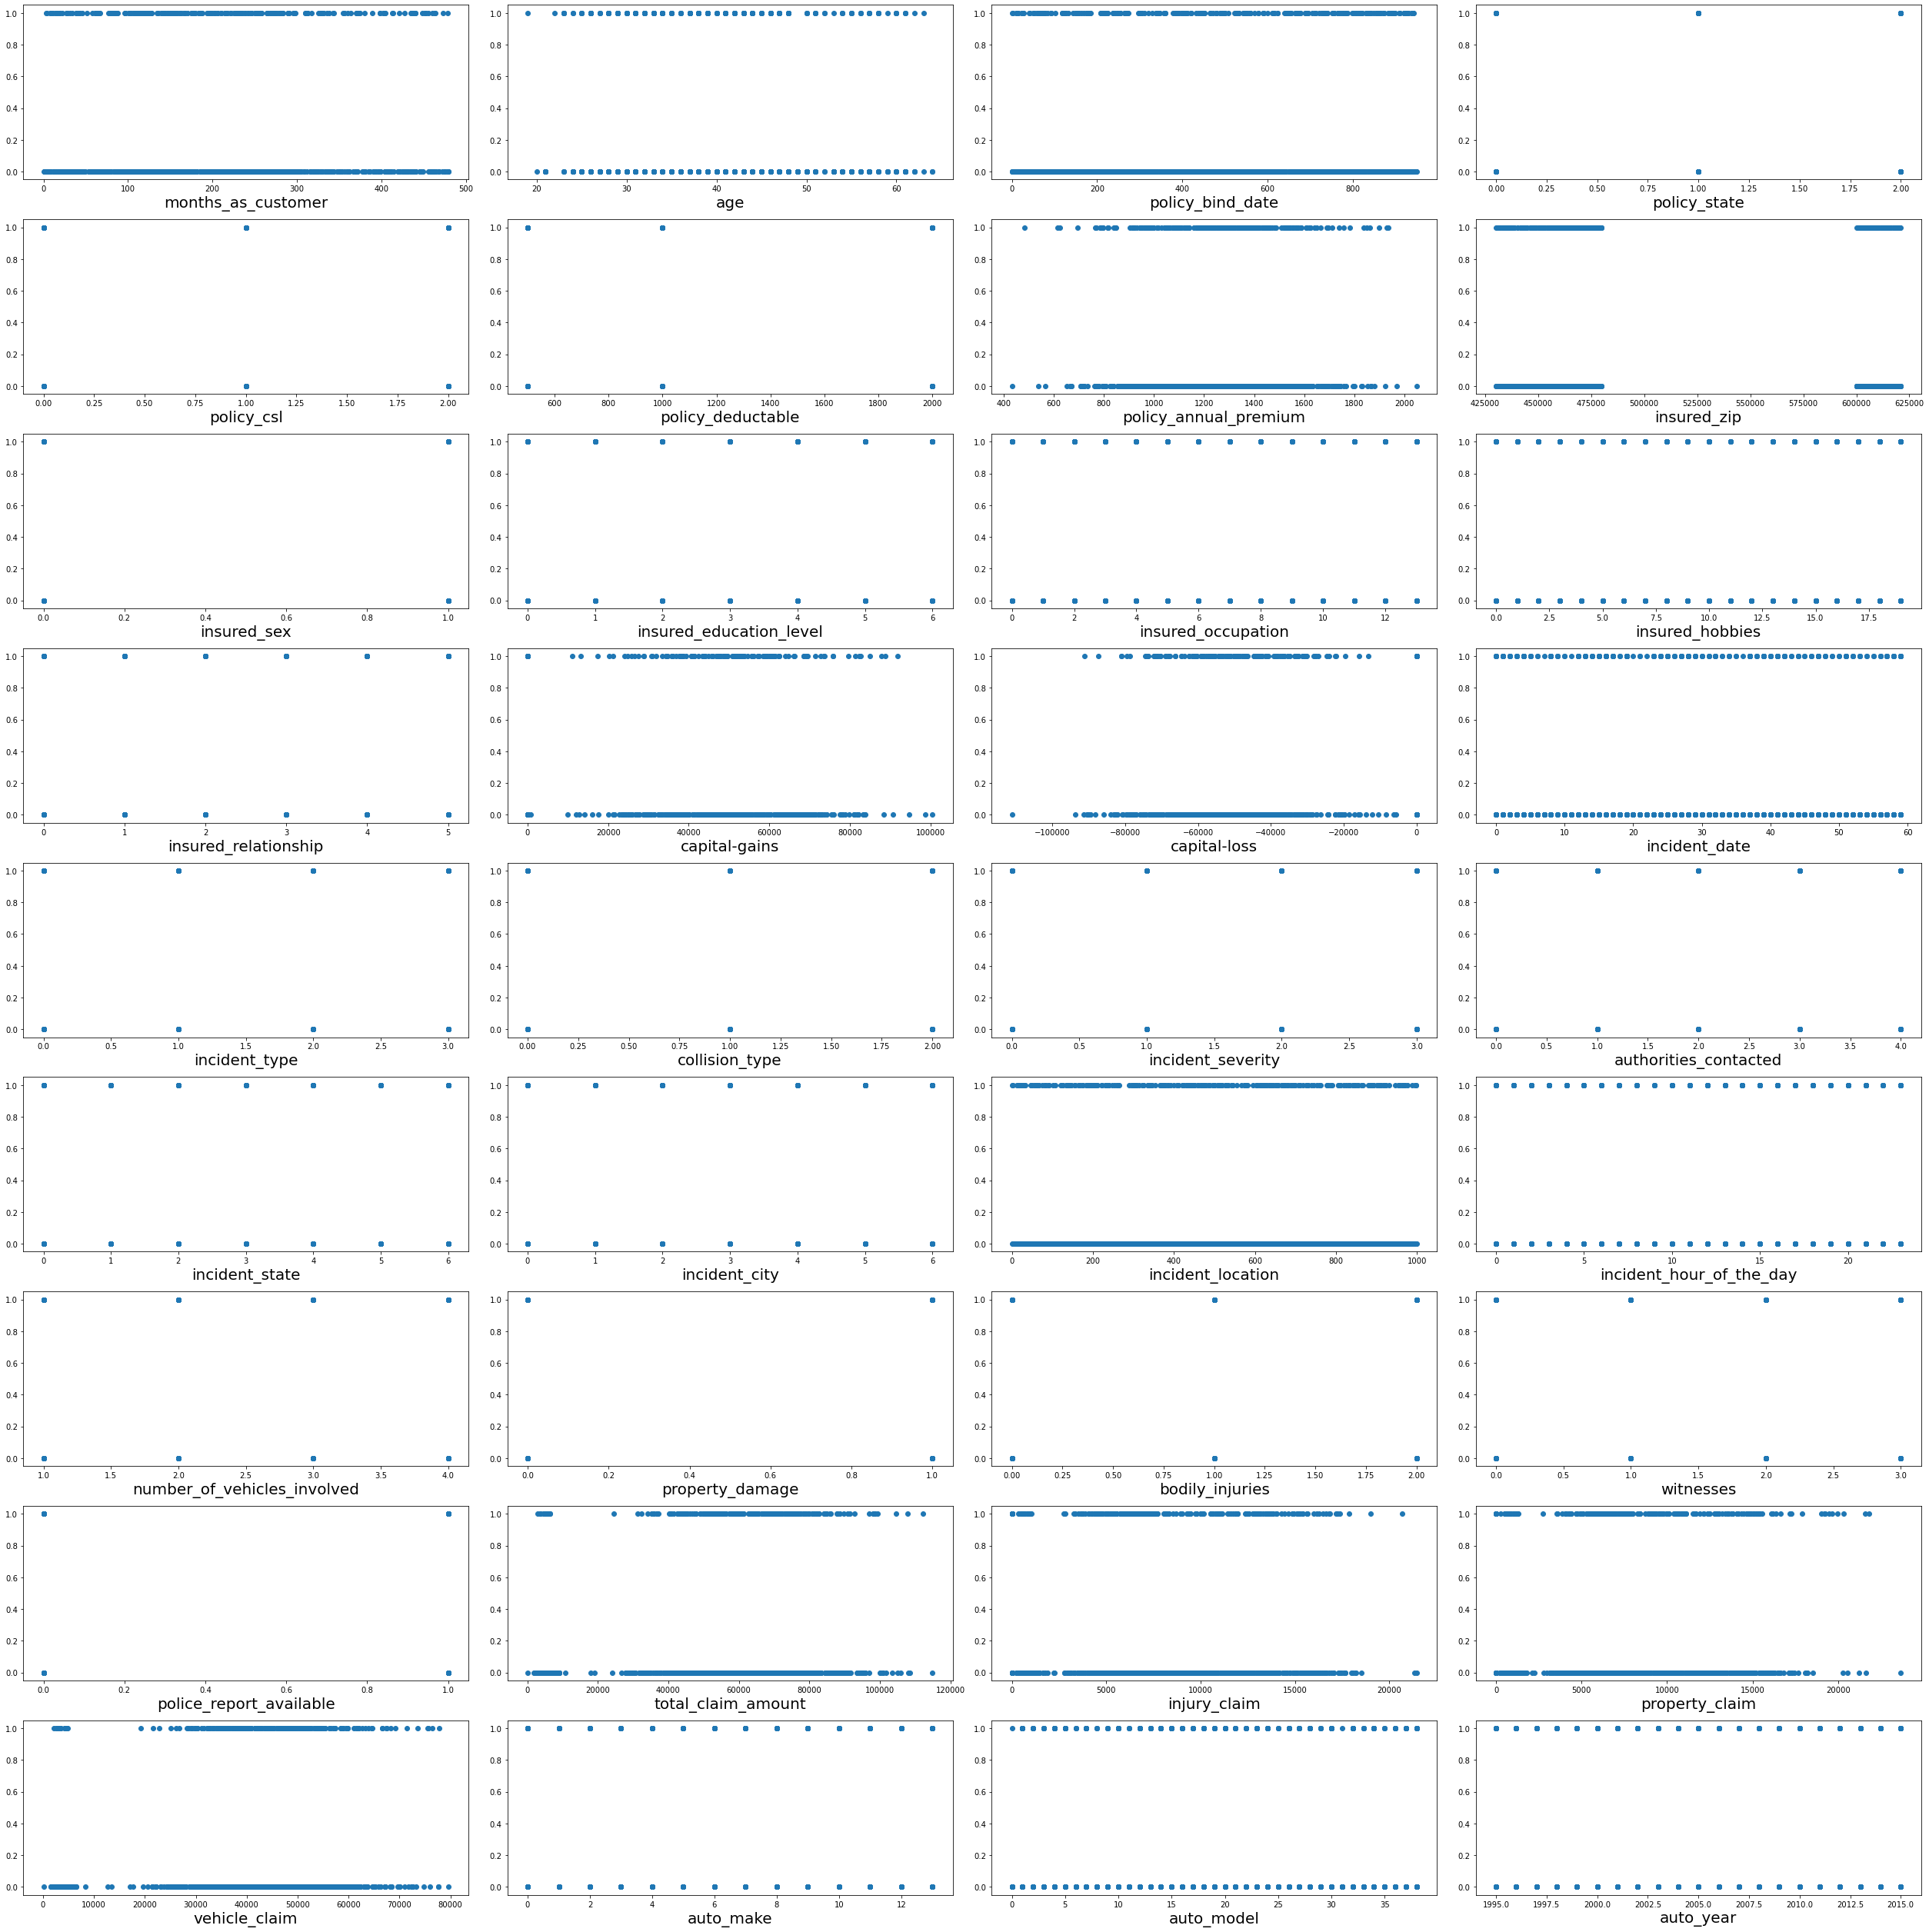

In [20]:
plt.figure(figsize=(35,35), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 36:
        ax = plt.subplot(9,4,plotno)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

total_claim_amount, vehicle_claim and property_claim has co-relation with Label

In [21]:
df.drop('fraud_reported',axis=1).corrwith(df.fraud_reported)

months_as_customer             0.020544
age                            0.012143
policy_bind_date               0.060642
policy_state                   0.029432
policy_csl                    -0.037190
policy_deductable              0.014817
policy_annual_premium         -0.014480
insured_zip                    0.019368
insured_sex                    0.030873
insured_education_level        0.008808
insured_occupation             0.001564
insured_hobbies               -0.046838
insured_relationship           0.021043
capital-gains                 -0.019173
capital-loss                  -0.014863
incident_date                 -0.047726
incident_type                 -0.050376
collision_type                -0.017315
incident_severity             -0.405988
authorities_contacted         -0.045802
incident_state                -0.051407
incident_city                 -0.040403
incident_location             -0.008832
incident_hour_of_the_day       0.004316
number_of_vehicles_involved    0.051839


insured_education_level, insured_occupation, incident_location, incident_hour_of_the_day, auto_model and auto_year has less/no corelation with label

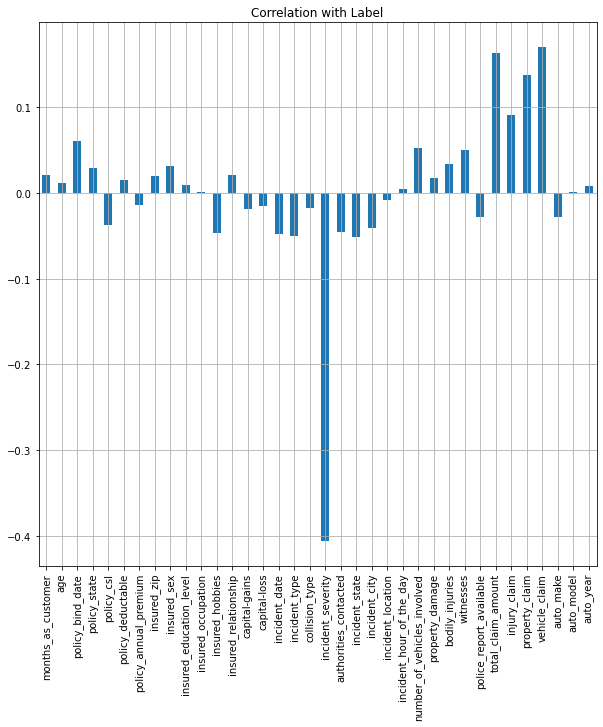

In [22]:
df.drop('fraud_reported',axis=1).corrwith(df.fraud_reported).plot(kind='bar',grid=True,figsize=(10,10),
                                                     title="Correlation with Label")
plt.show()

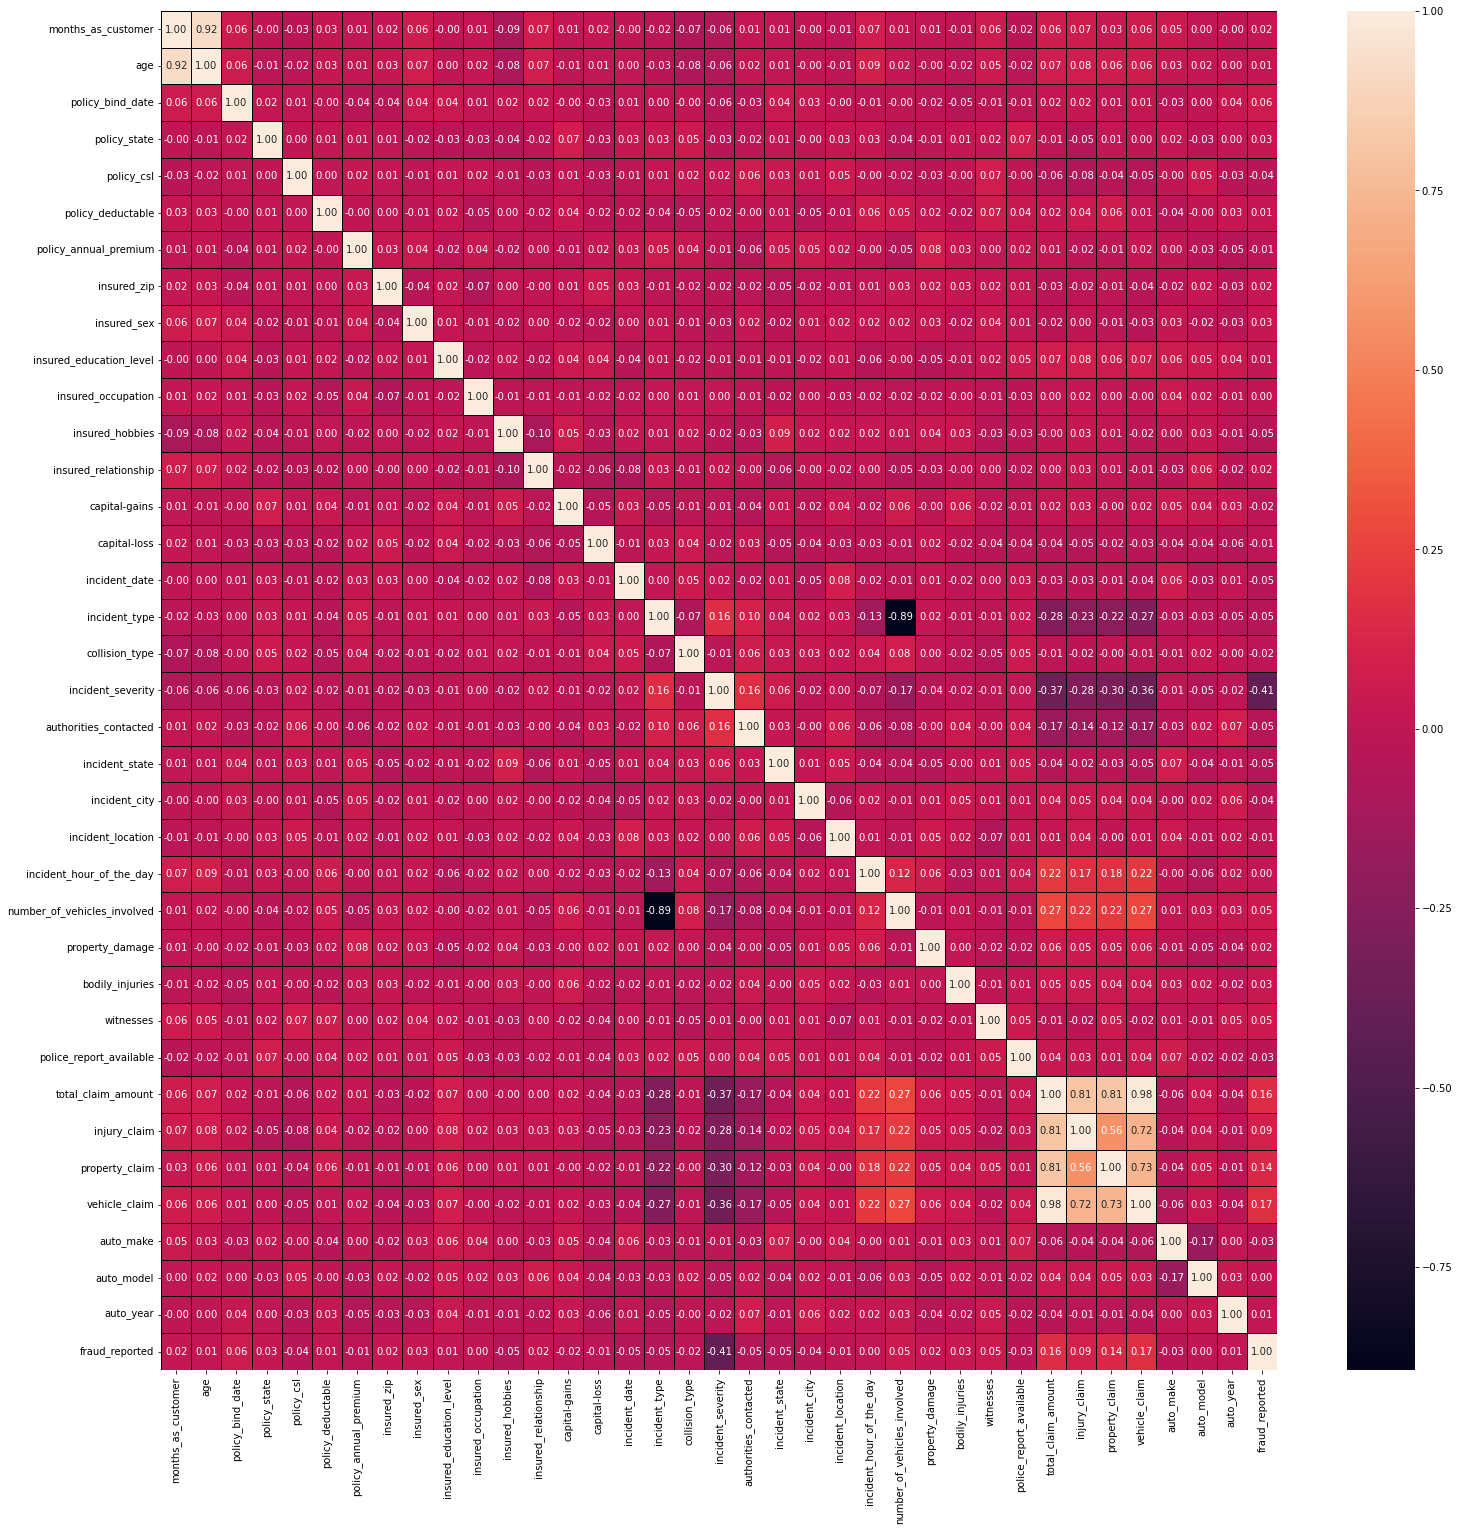

In [23]:
plt.figure(figsize = (25,25))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor='black',fmt = '.2f')
plt.show()

Multicollinearity problem exist in this database

- age and months_as_customer column has Multicollinearity issue.
- total_claim_amount and vehicle_claim column has Multicollinearity issue.

In [24]:
df.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [25]:
x = df[['months_as_customer', 'age']]
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif

,Features,VIF
0,months_as_customer,10.548089
1,age,10.548089


Both columns have same VIF score however age column has less co-relation with label hence have dropped age column

In [26]:
df = df.drop('age',axis=1)

In [27]:
x = df[['total_claim_amount', 'vehicle_claim']]
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif

,Features,VIF
0,total_claim_amount,145.79828
1,vehicle_claim,145.79828


Both columns have same VIF score however total_claim_amount column has less co-relation with label hence have dropped total_claim_amount column

In [28]:
df = df.drop('total_claim_amount',axis=1)

In [29]:
x = df.drop('fraud_reported',axis=1)
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif

,Features,VIF
0,months_as_customer,4.340007
1,policy_bind_date,4.063736
2,policy_state,2.570313
3,policy_csl,2.462608
4,policy_deductable,4.612186
5,policy_annual_premium,28.475240
6,insured_zip,51.190291
7,insured_sex,1.908170
8,insured_education_level,3.453993
9,insured_occupation,3.815699


- insured_education_level, insured_occupation, incident_location, incident_hour_of_the_day and auto_model has no co-relation with Label hence have dropped the column.
- auto_year has high VIF and no co-relation with Label hence have dropped

In [30]:
df = df.drop(['insured_education_level', 'insured_occupation','incident_location','incident_hour_of_the_day','auto_model','auto_year'],axis=1)

In [31]:
x = df.drop('fraud_reported',axis=1)
y = df['fraud_reported']

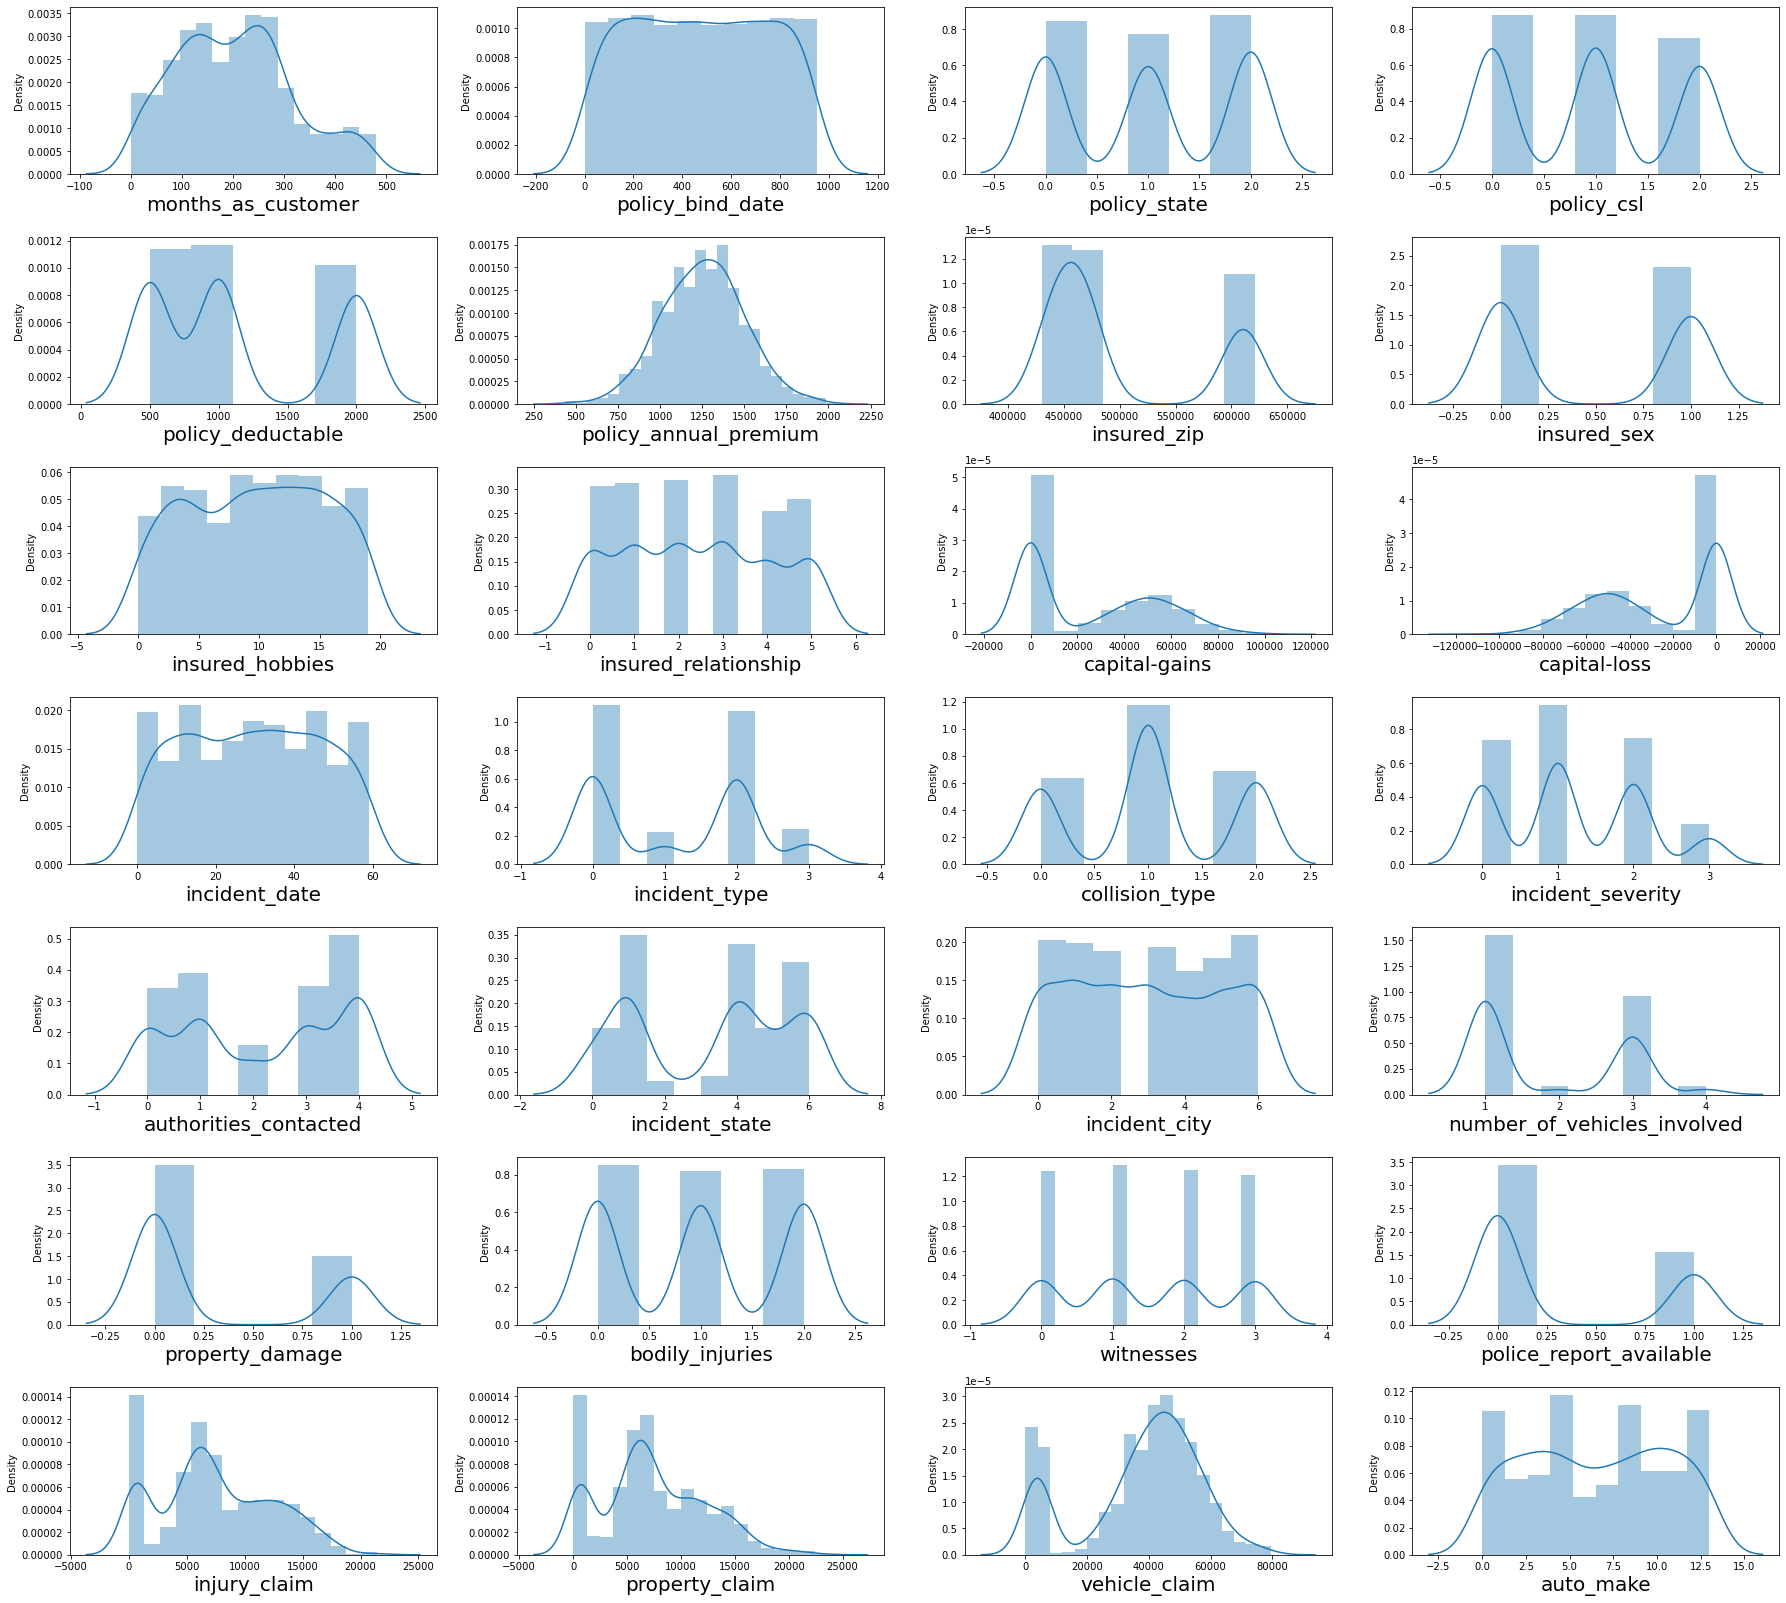

In [32]:
plt.figure(figsize=(25,25), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 32:
        ax = plt.subplot(8,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

Not considering skewness of categorical data columns

In [33]:
df.skew()

months_as_customer             0.362177
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
insured_zip                    0.816554
insured_sex                    0.148630
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.802728
injury_claim                   0.264811


Not considering skewness of categorical data columns

In [34]:
df.describe()

,months_as_customer,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_hobbies,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,474.332000,1.01400,0.951000,1136.000000,1256.406150,501214.488000,0.463000,9.731000,2.416000,...,1.83900,0.302000,0.992000,1.487000,0.314000,7433.420000,7399.570000,37928.950000,6.546000,0.247000
std,115.113174,275.402851,0.83096,0.804516,611.864673,244.167395,71701.610941,0.498879,5.674049,1.681003,...,1.01888,0.459355,0.820127,1.111335,0.464349,4880.951853,4824.726179,18886.252893,4.034869,0.431483
min,0.000000,0.000000,0.00000,0.000000,500.000000,433.330000,430104.000000,0.000000,0.000000,0.000000,...,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
25%,115.750000,233.750000,0.00000,0.000000,500.000000,1089.607500,448404.500000,0.000000,5.000000,1.000000,...,1.00000,0.000000,0.000000,1.000000,0.000000,4295.000000,4445.000000,30292.500000,3.000000,0.000000
50%,199.500000,472.500000,1.00000,1.000000,1000.000000,1257.200000,466445.500000,0.000000,10.000000,2.000000,...,1.00000,0.000000,1.000000,1.000000,0.000000,6775.000000,6750.000000,42100.000000,7.000000,0.000000
75%,276.250000,713.250000,2.00000,2.000000,2000.000000,1415.695000,603251.000000,1.000000,15.000000,4.000000,...,3.00000,1.000000,2.000000,2.000000,1.000000,11305.000000,10885.000000,50822.500000,10.000000,0.000000
max,479.000000,950.000000,2.00000,2.000000,2000.000000,2047.590000,620962.000000,1.000000,19.000000,5.000000,...,4.00000,1.000000,2.000000,3.000000,1.000000,21450.000000,23670.000000,79560.000000,13.000000,1.000000


Database is ready to remove outliers if exist 

In [35]:
x = df.drop(['fraud_reported'],axis=1)
y = df['fraud_reported']

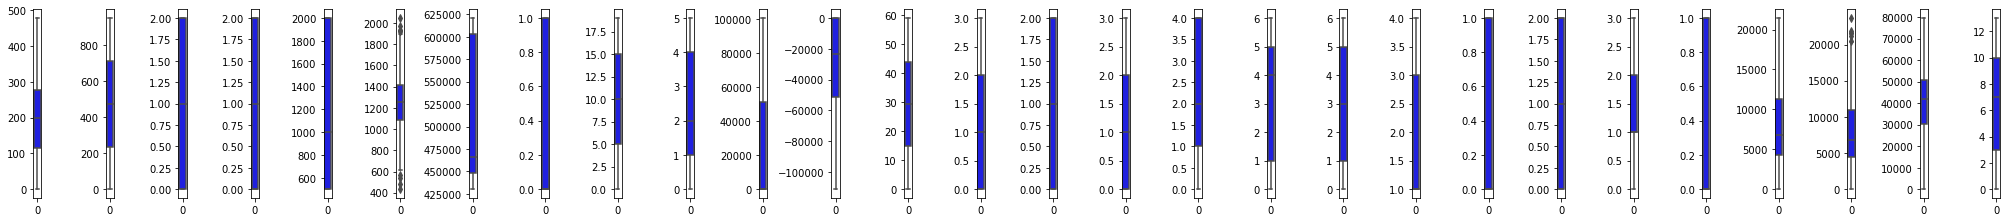

In [36]:
a = x.columns.values
col = 30
row = 20
plt.figure(figsize = (col,3*row))
for i in range(0, len(a)):
    plt.subplot(row,col,i+1)
    sns.boxplot(data = x[a[i]],color='blue',orient='v')
    plt.tight_layout()

policy_annual_premium and property_claim has outliers

In [37]:
old_data = (df.shape)[0]

In [38]:
q1 = df['policy_annual_premium'].quantile(0.25)
q3 = df['policy_annual_premium'].quantile(0.75)
iqr = q3 - q1

upper = df.iloc[np.where(df['policy_annual_premium'] > (q3+1.5*iqr))]
lower = df.iloc[np.where(df['policy_annual_premium'] < (q1-1.5*iqr))]

a = upper.index
b = lower.index

df.drop(a, inplace = True)
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed outliers from policy_annual_premium column

In [39]:
q1 = df['property_claim'].quantile(0.25)
q3 = df['property_claim'].quantile(0.75)
iqr = q3 - q1

upper = df.iloc[np.where(df['property_claim'] > (q3+1.5*iqr))]
lower = df.iloc[np.where(df['property_claim'] < (q1-1.5*iqr))]

a = upper.index
b = lower.index

df.drop(a, inplace = True)
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed outliers from property_claim column

In [40]:
new_data = (df.shape)[0]

In [41]:
data_loss = old_data - new_data
print('Data Loss -',data_loss)

Data Loss - 14


In [42]:
x = df.drop(['fraud_reported'],axis=1)
y = df['fraud_reported']

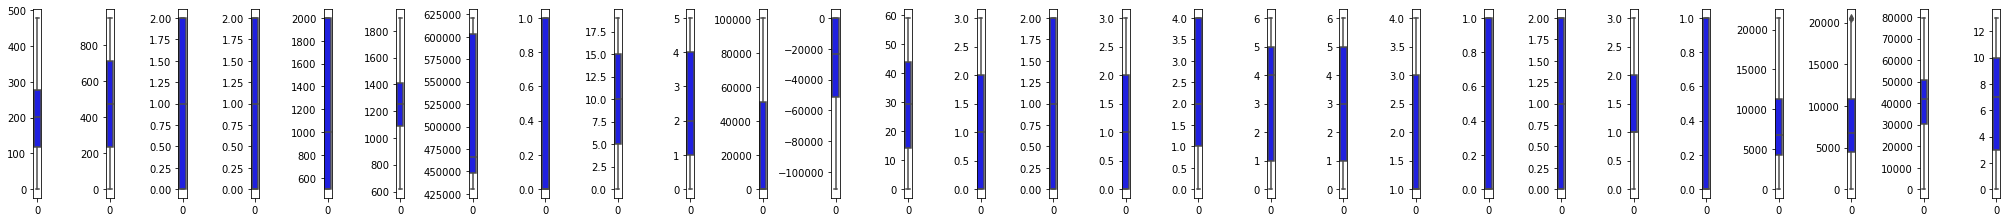

In [43]:
a = x.columns.values
col = 30
row = 20
plt.figure(figsize = (col,3*row))
for i in range(0, len(a)):
    plt.subplot(row,col,i+1)
    sns.boxplot(data = x[a[i]],color='blue',orient='v')
    plt.tight_layout()

Removed outliers that are not allowed as per the method

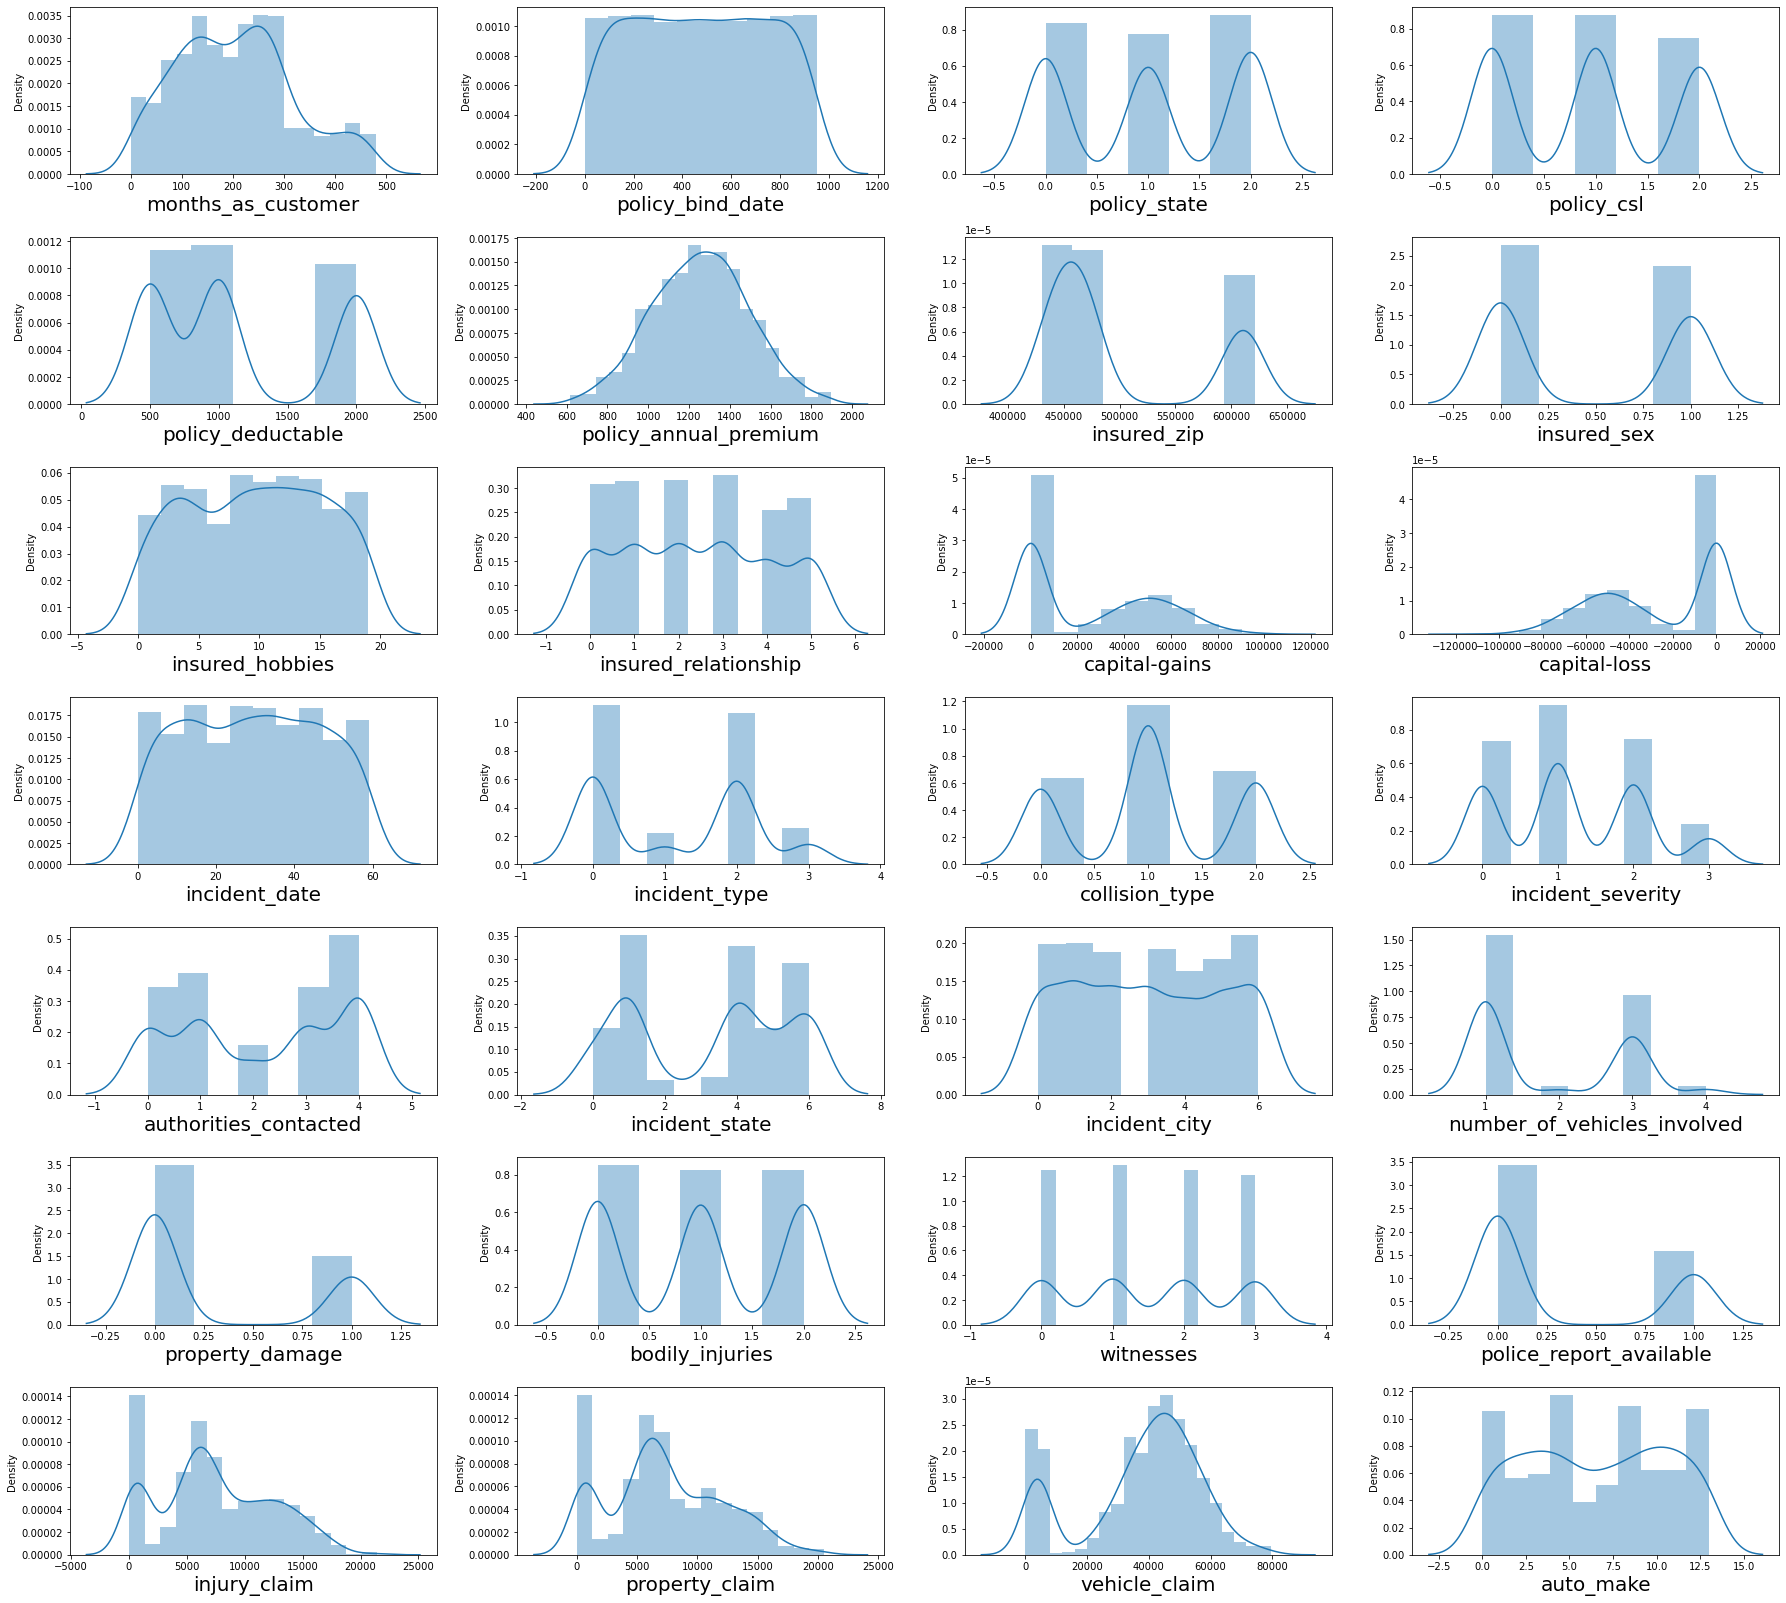

In [44]:
plt.figure(figsize=(25,25), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 32:
        ax = plt.subplot(8,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

There is no skewness in the data hence not using power transformation techniques.

In [45]:
x = df.drop(['fraud_reported'],axis=1)
y = df['fraud_reported']

In [46]:
df['fraud_reported'].value_counts()

0.0    744
1.0    242
Name: fraud_reported, dtype: int64

There is a imbalance in the Label hence have applied OverSampling method to balance the dataset

In [47]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(x)

Scaling the data

In [48]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.01,random_state = 65)

Have added test_size small so that we can not loose train data

In [49]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [50]:
ove_smp=SMOTE(0.75)

x_train_new, y_train_new = ove_smp.fit_sample(x_train, y_train)

In [51]:
print (y_train.value_counts())
print (y_train_new.value_counts())

0.0    738
1.0    238
Name: fraud_reported, dtype: int64
0.0    738
1.0    553
Name: fraud_reported, dtype: int64


Now the data is balanced

In [52]:
X_scale = x_train_new
y = y_train_new

Scaled the Data

# Model Buidling

# LogisticRegression

In [53]:
maxAccu =0 
maxRS= 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = i)
    log = LogisticRegression()
    log.fit(x_train,y_train)
    y_pred=log.predict(x_test)
    acc=accuracy_score(y_test, y_pred)
    print('accuracy', acc,'Random_state',i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('max_accuracy', maxAccu,'max_Random_state',i)

accuracy 0.7368421052631579 Random_state 1
max_accuracy 0.7368421052631579 max_Random_state 1
accuracy 0.7863777089783281 Random_state 2
max_accuracy 0.7863777089783281 max_Random_state 2
accuracy 0.7708978328173375 Random_state 3
accuracy 0.7770897832817337 Random_state 4
accuracy 0.7523219814241486 Random_state 5
accuracy 0.7647058823529411 Random_state 6
accuracy 0.7492260061919505 Random_state 7
accuracy 0.7523219814241486 Random_state 8
accuracy 0.7492260061919505 Random_state 9
accuracy 0.7616099071207431 Random_state 10
accuracy 0.7492260061919505 Random_state 11
accuracy 0.7678018575851393 Random_state 12
accuracy 0.7244582043343654 Random_state 13
accuracy 0.7832817337461301 Random_state 14
accuracy 0.7585139318885449 Random_state 15
accuracy 0.7708978328173375 Random_state 16
accuracy 0.7554179566563467 Random_state 17
accuracy 0.7368421052631579 Random_state 18
accuracy 0.7678018575851393 Random_state 19
accuracy 0.7678018575851393 Random_state 20
accuracy 0.7678018575851393

In [64]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = 82)

In [65]:
def print_score(clf, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        
        print('\n===============Train Result===============')
        print(f'Accuracy Score: {accuracy_score(y_train, y_pred)*100:.2f}%')
        
        
    elif train==False:
        pred = clf.predict(x_test)
        
        print('\n===============Test Result===============')
        print(f'Accuracy Score: {accuracy_score(y_test, pred)*100:.2f}%')
        
        print('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2))
        
        scr_log = cross_val_score(clf,X_scale,y,cv=5)
        print('Cross Validation Score- ', scr_log.mean())

In [66]:
log = LogisticRegression()
log.fit(x_train,y_train)

print_score(log,x_train,x_test,y_train,y_test, train=True)
print_score(log,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 77.17%

===============Test Result===============
Accuracy Score: 82.35%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       189
         1.0       0.82      0.74      0.78       134

    accuracy                           0.82       323
   macro avg       0.82      0.81      0.82       323
weighted avg       0.82      0.82      0.82       323

Cross Validation Score-  0.7629942234593398


# RandomForestClassifier

In [67]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

print_score(rfc,x_train,x_test,y_train,y_test, train=True)
print_score(rfc,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 100.00%

===============Test Result===============
Accuracy Score: 87.00%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.87      0.92      0.89       189
         1.0       0.88      0.80      0.84       134

    accuracy                           0.87       323
   macro avg       0.87      0.86      0.86       323
weighted avg       0.87      0.87      0.87       323

Cross Validation Score-  0.8505641854479062


# DecisionTreeClassifier

In [68]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

print_score(dtc,x_train,x_test,y_train,y_test, train=True)
print_score(dtc,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 100.00%

===============Test Result===============
Accuracy Score: 84.21%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.86      0.87      0.87       189
         1.0       0.81      0.81      0.81       134

    accuracy                           0.84       323
   macro avg       0.84      0.84      0.84       323
weighted avg       0.84      0.84      0.84       323

Cross Validation Score-  0.8164676304211188


# GradientBoostingClassifier

In [69]:
gbdt = GradientBoostingClassifier()
gbdt.fit(x_train,y_train)

print_score(gbdt,x_train,x_test,y_train,y_test, train=True)
print_score(gbdt,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 96.49%

===============Test Result===============
Accuracy Score: 87.62%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.89      0.90      0.89       189
         1.0       0.86      0.84      0.85       134

    accuracy                           0.88       323
   macro avg       0.87      0.87      0.87       323
weighted avg       0.88      0.88      0.88       323

Cross Validation Score-  0.8497560683607194


# Support Vector Classifier

In [70]:
svc = SVC()
svc.fit(x_train,y_train)

print_score(svc,x_train,x_test,y_train,y_test, train=True)
print_score(svc,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 92.77%

===============Test Result===============
Accuracy Score: 84.83%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.85      0.89      0.87       189
         1.0       0.84      0.78      0.81       134

    accuracy                           0.85       323
   macro avg       0.85      0.84      0.84       323
weighted avg       0.85      0.85      0.85       323

Cross Validation Score-  0.8203316273083715


# KNeighborsClassifier

In [71]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

print_score(knn,x_train,x_test,y_train,y_test, train=True)
print_score(knn,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 77.48%

===============Test Result===============
Accuracy Score: 67.18%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.84      0.54      0.66       189
         1.0       0.57      0.85      0.68       134

    accuracy                           0.67       323
   macro avg       0.70      0.70      0.67       323
weighted avg       0.73      0.67      0.67       323

Cross Validation Score-  0.6855646344018437


# Findings

- LogisticsRegression - Cross Validation Score is 76.29%, Accuracy Score of Train Result is 77.17% and Test Result is 82.35%
- RandomForestClassifier - Cross Validation Score is 85.05%, Accuracy Score of Train Result is 100.00% and Test Result is 87.00%
- DecisionTreeClassifier - Cross Validation Score is 81.64%, Accuracy Score of Train Result is 100.00% and Test Result is 84.21%
- GradientBoostingClassifier - Cross Validation Score is 84.97%, Accuracy Score of Train Result is 96.49% and Test Result is 87.62%
- Support Vector Classifier - Cross Validation Score is 82.03%, Accuracy Score of Train Result is 92.77% and Test Result is 84.83%
- KNeighborsClassifier - Cross Validation Score is 68.55%, Accuracy Score of Train Result is 77.48% and Test Result is 67.18%

##### Choosing LogisticsRegression model for hyper tuning since the train and test accuracy is high and close to each other

# Hyper Parameter Tuning

In [72]:
grid_param = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': range(1,5),
    'dual':[True,False],
    'fit_intercept':[True,False],
}

Selecting Parameters for Hyper Parameter Tuning

In [73]:
grid_search = GridSearchCV(estimator=log,
                           param_grid=grid_param,
                           cv=3,
                           n_jobs =-1
                          )

Searching the best grid for the model

In [74]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': range(1, 5), 'dual': [True, False],
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']})

Training the model (Note:- Have not added more parameters since it was taking a long time to train and the laptop is not that powerful to load this code hence have removed some parameters)

In [75]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'C': 1, 'dual': False, 'fit_intercept': True, 'penalty': 'l2'}


In [76]:
log = LogisticRegression(C= 1, dual = False,  fit_intercept= True, penalty='l2')
log.fit(x_train,y_train)

LogisticRegression(C=1)

Applying best parameters to train the model

In [77]:
y_pred = log.predict(x_test)
pred = log.predict(x_train)

In [78]:
print(f'Train Accuracy Score: {accuracy_score(y_train, pred)*100:.2f}%')
print(f'Test Accuracy Score: {accuracy_score(y_test, y_pred)*100:.2f}%')
print(classification_report(y_test, y_pred))

Train Accuracy Score: 77.17%
Test Accuracy Score: 82.35%
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       189
         1.0       0.82      0.74      0.78       134

    accuracy                           0.82       323
   macro avg       0.82      0.81      0.82       323
weighted avg       0.82      0.82      0.82       323



- Previous Train accuracy score - 77.17% and New Train accuracy score - 77.17%
- Previous Test accuracy score - 82.35% and New Test accuracy score - 82.35%

# AUR ROC Curve

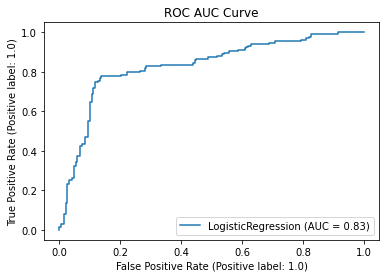

In [79]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(log,x_test,y_test)
plt.title("ROC AUC Curve")
plt.show()

#### Accuracy score of LogisticsRegression after Tuning the model is 82.35% and AUC score is 83% which is pretty good

## Saving the Model

In [81]:
file = 'Insurance_Claims.pickle'
pickle.dump(log, open(file, 'wb'))